# Natural Language Processing with Disaster Tweets - Kaggle Competition

Click <a href="https://www.kaggle.com/competitions/nlp-getting-started/overview">here</a> for an overview of the NLP disaster tweets Kaggle's competition.

<b> Goal: </b> To predict which Tweets are about real disasters and which ones are not.

Data are taken from Kaggle: 
click <a href="https://www.kaggle.com/competitions/nlp-getting-started/data">here</a> for an explanation of the datasets.

## Table of Contents:
* [<p>&#128229; Load the Data</p>](#first-bullet) 
* [<p>&#128202; Exploratory Data Analysis and Data Visualisation</p>](#second-bullet)
* [<p>&#128295; Data Preprocessing: Punctuation, Number, Stopwords, http-adresses removal, Lemmatization, Vectorization</p>](#third-bullet)   
* [<p>&#129302; ML - Multinomial Naive Bayes Classifier</p>](#fourth-bullet)
* [<p>&#129497; Reformat the test data and make predictions with Multinomial NB</p>](#fifth-bullet)
* [<p>&#129302; ML - Logistic Regression Classifier</p>](#sixth-bullet)
* [<p>&#129497; Reformat the test data and make predictions with Logistic Regression</p>](#seventh-bullet)

<h2 style='color:Red;'><p>&#128229; Load the Data</p> <a class="anchor" id="first-bullet"></a>

In [1]:
# Import pandas and numpy

import pandas as pd
import numpy as np

In [2]:
# Load the data

train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Drop out the id column of train

train = train.drop('id', axis=1)

<h2 style='color:Red;'><p>&#128202; Exploratory Data Analysis and Data Visualisation</p> <a class="anchor" id="second-bullet"></a>

In [4]:
# Info of the dataframe

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.0+ KB


In [5]:
# Missing values of train

train.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
train.groupby('target').describe()

keyword                          location                        text  \
         count unique          top freq    count unique       top freq count   
target                                                                         
0         4323    218  body%20bags   40     2884   2142  New York   55  4342   
1         3229    220   derailment   39     2196   1513       USA   67  3271   

                                                                       
       unique                                                top freq  
target                                                                 
0        4315  The Prophet (peace be upon him) said 'Save you...    4  
1        3206  11-Year-Old Boy Charged With Manslaughter of T...   10

In [7]:
# Import visualisation libraries


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<Axes: xlabel='target', ylabel='count'>

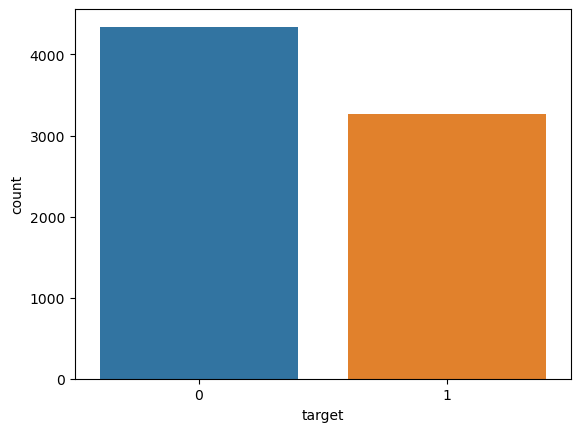

In [8]:
# Countplot: 0 = no-emergency, 1 = emergency 

sns.countplot(data=train, x='target')

In [9]:
# Length of the tweets column (total number of carachters )

train['length'] = train['text'].apply(len)
train.head()

,keyword,location,text,target,length
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [10]:
# Fill missing values

train['keyword'].fillna('unknown', inplace=True)
train['location'].fillna('unknown', inplace=True)

In [11]:
train.head()

,keyword,location,text,target,length
0,unknown,unknown,Our Deeds are the Reason of this #earthquake M...,1,69
1,unknown,unknown,Forest fire near La Ronge Sask. Canada,1,38
2,unknown,unknown,All residents asked to 'shelter in place' are ...,1,133
3,unknown,unknown,"13,000 people receive #wildfires evacuation or...",1,65
4,unknown,unknown,Just got sent this photo from Ruby #Alaska as ...,1,88


In [12]:
# All the keywords

n = train['keyword'].unique().shape[0]

print(f'There are in total {n} unique keywords in the dataframe:')

train['keyword'].unique()

There are in total 222 unique keywords in the dataframe:


array(['unknown', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail'

In [13]:
# All the locations

m = train['location'].unique().shape[0]

print(f'There are in total {m} unique locations in the dataframe:')

train['location'].unique()

There are in total 3342 unique locations in the dataframe:


array(['unknown', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

<Axes: xlabel='length', ylabel='Count'>

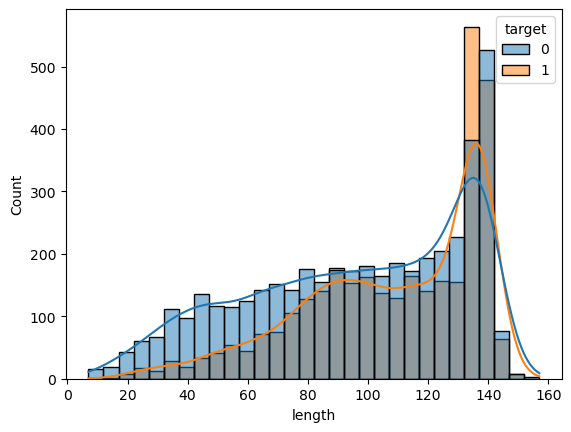

In [14]:
# Messages' length frequency by target

sns.histplot(data = train, x = 'length', bins = 30, kde = True, hue='target')

<Axes: xlabel='target', ylabel='length'>

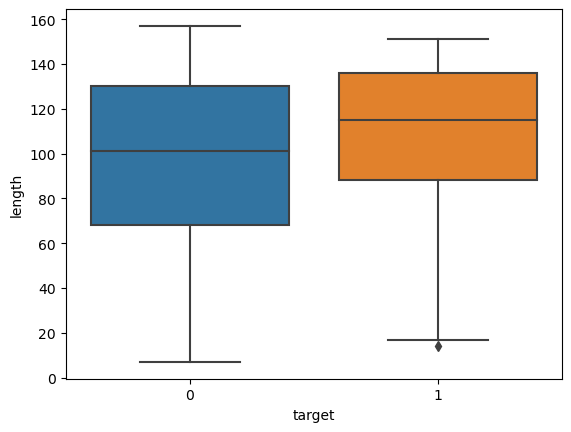

In [15]:
# Boxplot of target vs. length

sns.boxplot(data= train, x='target', y ='length')

In [16]:
train.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

<h2 style='color:Red;'><p>&#128295; Data Preprocessing</p><a class="anchor" id="third-bullet"></a>

<ol>
  <li>Punctuation removal</li>
  <li>Number removal</li>
  <li>Stopwords removal</li>
  <li>http adresses removal</li>
  <li>Lemmatization</li>
  <li>Vectorization</li>
</ol>


In [17]:
# Import nlp modules 

import nltk 
import string
import re
from nltk.corpus import stopwords

In [18]:
# String module constants

print(string.ascii_letters)
print(string.ascii_lowercase)
print(string.ascii_uppercase)
print(string.digits)
print(string.hexdigits)
#print(string.whitespace)  # ' \t\n\r\x0b\x0c'
print(string.punctuation)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
abcdefghijklmnopqrstuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
0123456789
0123456789abcdefABCDEF
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
# Define clean_text function

def clean_text(mess):
    """
    Takes in a string of text, then performs the following:
    
    1. Remove http addresses
    1. Lower
    2. Remove all numbers
    3. Remove all punctuation
    4. Remove all stopwords
    5. Returns a list of the cleaned text
    """
    # Remove http addresses
    
    mess = re.sub(r'http\S+', '', mess)
    
    # All lowercase
    mess = mess.lower()
    
    # Check characters to see if they are in digits
    nodigit = [char for char in mess if char not in string.digits]
    
    # Join the characters again to form the string.
    nodigit = ''.join(nodigit)
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in nodigit if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
        
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word not in stopwords.words('english')]
    
    
    
    

In [21]:
# Apply clean_text to text column of train

train['text'] = train['text'].apply(clean_text)

In [22]:
train.head()


,keyword,location,text,target,length
0,unknown,unknown,"[deeds, reason, earthquake, may, allah, forgiv...",1,69
1,unknown,unknown,"[forest, fire, near, la, ronge, sask, canada]",1,38
2,unknown,unknown,"[residents, asked, shelter, place, notified, o...",1,133
3,unknown,unknown,"[people, receive, wildfires, evacuation, order...",1,65
4,unknown,unknown,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,88


In [23]:
train['text'][1]

['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']

### Lemmatization

In [24]:
# WORDNET LEMMATIZER (with appropriate pos tags)

from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\giuli\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
# Define function to lemmatize each word with its POS tag

# POS_TAGGER_FUNCTION 
def pos_tagger(nltk_tag):
      if nltk_tag.startswith('J'):
        return wordnet.ADJ
      elif nltk_tag.startswith('V'):
        return wordnet.VERB
      elif nltk_tag.startswith('N'):
        return wordnet.NOUN
      elif nltk_tag.startswith('R'):
        return wordnet.ADV
      else:
        return None

In [27]:
def lemm_text(list_of_words):
    """
    TAG EACH WORD with this part of speech i.e. noun, verb, etc
    """
    # find the POS tag for each token
    pos_tagged = nltk.pos_tag(list_of_words) 
    
    # Use pos_tagger function to make things simpler to understand.
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    
    lemmatized_sentence = []
      
    for word, tag in wordnet_tagged:
            if tag is None:
              # if there is no available tag, append the token as is
              lemmatized_sentence.append(word)
            else:
             # else use the tag to lemmatize the token
              lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
        #lemmatized_sentence = " ".join(lemmatized_sentence)

    return lemmatized_sentence
    

In [28]:
 lemm_text(['has','been','flies','running'])

['have', 'be', 'fly', 'run']

In [29]:
# Apply lemm_text to text column of train

train['text'] = train['text'].apply(lemm_text)

In [30]:
# Apply clean_text and lemm_text also to keyword column of train

train['keyword'] = train['keyword'].apply(clean_text)
train['keyword'] = train['keyword'].apply(lemm_text)

In [31]:
train.head()

,keyword,location,text,target,length
0,[unknown],unknown,"[deed, reason, earthquake, may, allah, forgive...",1,69
1,[unknown],unknown,"[forest, fire, near, la, ronge, sask, canada]",1,38
2,[unknown],unknown,"[resident, ask, shelter, place, notify, office...",1,133
3,[unknown],unknown,"[people, receive, wildfire, evacuation, order,...",1,65
4,[unknown],unknown,"[get, sent, photo, ruby, alaska, smoke, wildfi...",1,88


In [32]:
# Define to_text function: it takes a list of strings and returns the string composed by its strings

def to_text(list_of_words):
    text = " ".join(list_of_words)
    
    return text

In [33]:
# Example

to_text(['My','name is','Giu'])

'My name is Giu'

In [34]:
# Apply to_text to keyword column

train['keyword'] = train['keyword'].apply(to_text)

In [35]:
train['keyword'].unique()

array(['unknown', 'ablaze', 'accident', 'aftershock', 'airplaneaccident',
       'ambulance', 'annihilate', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'avalanche',
       'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing',
       'bleeding', 'blewup', 'blight', 'blizzard', 'blood', 'bloody',
       'blownup', 'bodybag', 'bodybagging', 'bodybags', 'bomb', 'bombed',
       'bombing', 'bridgecollapse', 'buildingsburning', 'buildingsonfire',
       'burn', 'burning', 'burningbuildings', 'bushfires', 'casualty',
       'catastrophe', 'catastrophic', 'chemicalemergency', 'clifffall',
       'collapse', 'collide', 'collision', 'crash', 'crashed', 'crush',
       'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'debris',
       'deluge', 'demolish', 'demolition', 'derail', 'derailment',
       'desolate', 'desolation', 'destroy', 'destroyed', 'destruction',
       'detonate', 'detonation', 'devastate', 'devastation', 'disaster',
  

In [36]:
n_keywords = len(train['keyword'].unique())

print(f'There are {n_keywords} unique keywords after text preprocessing!')

There are 190 unique keywords after text preprocessing!


In [37]:
# Apply to_text on text column

train['text'] = train['text'].apply(to_text)

In [38]:
train.head()

,keyword,location,text,target,length
0,unknown,unknown,deed reason earthquake may allah forgive us,1,69
1,unknown,unknown,forest fire near la ronge sask canada,1,38
2,unknown,unknown,resident ask shelter place notify officer evac...,1,133
3,unknown,unknown,people receive wildfire evacuation order calif...,1,65
4,unknown,unknown,get sent photo ruby alaska smoke wildfires pou...,1,88


### Wordclouds

In [39]:
from wordcloud import WordCloud

In [40]:
train_1 = train[train['target'] == 1]
train_0 = train[train['target'] == 0]

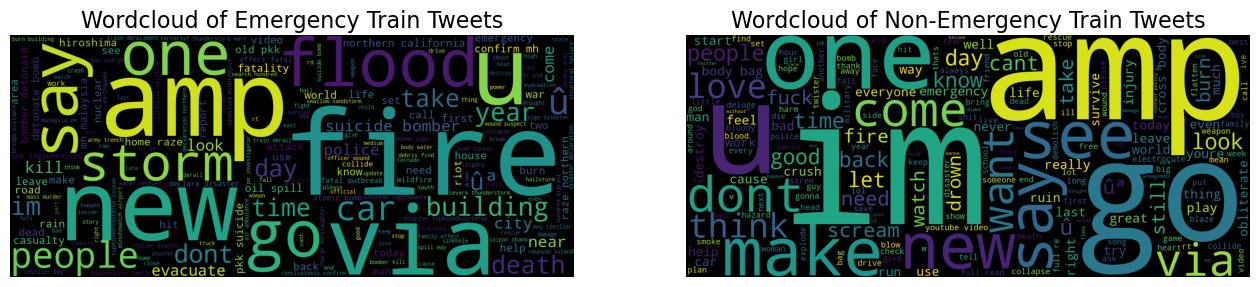

In [41]:
def generate_and_display_wordcloud_text(data, title, ax):
    wordcloud = WordCloud(width=1400, height=600, background_color='black').generate(''.join(text for text in data['text']))
    
    ax.imshow(wordcloud)
    ax.set_title(f'Wordcloud of {title}', fontsize=16)
    ax.axis('off')
    
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

generate_and_display_wordcloud_text(train_1, 'Emergency Train Tweets', axs[0])
generate_and_display_wordcloud_text(train_0, 'Non-Emergency Train Tweets', axs[1])

plt.show()

In [42]:
#def generate_and_display_wordcloud_keywords(data, title, ax):
#    wordcloud = WordCloud(width=1400, height=600, background_color='black').generate(''.join(text for text in data['keyword']))
    
#    ax.imshow(wordcloud)
#    ax.set_title(f'Wordcloud of {title}', fontsize=16)
#    ax.axis('off')
    
#fig, axs = plt.subplots(1, 2, figsize=(16, 8))

#generate_and_display_wordcloud_keywords(train_1, 'Emergency Train Keywords', axs[0])
#generate_and_display_wordcloud_keywords(train_0, 'Non-Emergency Train Keywords', axs[1])

#plt.show()

In [43]:
#wordcloud = WordCloud(width=1400, height=600, background_color='black').generate(''.join(text for text in train['text']))
    
# Display the generated image:
#plt.imshow(wordcloud_1, interpolation='bilinear')
#plt.axis("off")

#plt.show()
    

<h2 style='color:Red;'>&#129302; ML - Multinomial Naive Bayes Classifier <a class="anchor" id="fourth-bullet"></a>

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import  TfidfTransformer,CountVectorizer 
from sklearn.pipeline import Pipeline

In [45]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts - Vectorization - Sparse Matrix
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [46]:
X = train['text']
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [47]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [48]:
predictions = pipeline.predict(X_test)

In [49]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1170  160]
 [ 319  635]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1330
           1       0.80      0.67      0.73       954

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [50]:
tp = 1170
fn = 319
fp = 160
f1_score = tp / (tp+((fn+fp)/2))

In [51]:
print(f'The f1-score with Multinomial NB is: {int(round(f1_score,2)*100)}%')

The f1-score with Multinomial NB is: 83%


<h2 style='color:Red;'>&#129497; Reformat the test data and make predictions with Multinomial NB <a class="anchor" id="fifth-bullet"></a>



In [52]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [53]:
test.shape

(3263, 4)

In [54]:
# Fill missing values

test['keyword'].fillna('unknown', inplace=True)
test['location'].fillna('unknown', inplace=True)

In [55]:
# Apply preprocessing functions to keyword column of test

test['keyword'] = test['keyword'].apply(clean_text)
test['keyword'] = test['keyword'].apply(lemm_text)
test['keyword'] = test['keyword'].apply(to_text)

In [56]:
# Apply preprocessing functions to text column of test

test['text'] = test['text'].apply(clean_text)
test['text'] = test['text'].apply(lemm_text)
test['text'] = test['text'].apply(to_text)

In [57]:
test['keyword'].unique()

array(['unknown', 'ablaze', 'accident', 'aftershock', 'airplaneaccident',
       'ambulance', 'annihilate', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'avalanche',
       'battle', 'bioterror', 'bioterrorism', 'blaze', 'blazing',
       'bleeding', 'blewup', 'blight', 'blizzard', 'blood', 'bloody',
       'blownup', 'bodybag', 'bodybagging', 'bodybags', 'bomb', 'bombed',
       'bombing', 'bridgecollapse', 'buildingsburning', 'buildingsonfire',
       'burn', 'burning', 'burningbuildings', 'bushfires', 'casualty',
       'catastrophe', 'catastrophic', 'chemicalemergency', 'clifffall',
       'collapse', 'collide', 'collision', 'crash', 'crashed', 'crush',
       'curfew', 'cyclone', 'damage', 'danger', 'dead', 'death', 'debris',
       'deluge', 'demolish', 'demolition', 'derail', 'derailment',
       'desolate', 'desolation', 'destroy', 'destroyed', 'destruction',
       'detonate', 'detonation', 'devastate', 'devastation', 'disaster',
  

In [58]:
test['text'].unique()

array(['happen terrible car crash',
       'heard earthquake different city stay safe everyone',
       'forest fire spot pond geese flee across street cannot save', ...,
       'green line derailment chicago',
       'meg issue hazardous weather outlook hwo',
       'cityofcalgary activate municipal emergency plan yycstorm'],
      dtype=object)

In [59]:
y_pred = pipeline.predict(test['text'])

y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
# Dataframe of my predictions 

my_predictions = pd.DataFrame(y_pred)
my_predictions.rename(columns = {0:'target'}, inplace = True) 
my_predictions.head()

,target
0,1
1,1
2,1
3,1
4,1


In [61]:
# Submission with Multinomial NB

submissions_mnb = pd.concat([test['id'], my_predictions['target']], axis=1)
submissions_mnb.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [62]:
submissions_mnb.to_csv('submissions_mnb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


<h2 style='color:Red;'>&#129302; ML - Logistic Regression Classifier <a class="anchor" id="sixth-bullet"></a>




In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
X = train['text']
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [65]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build a logistic regression model
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)

# Make predictions
lr_predictions = lr_classifier.predict(X_test_tfidf)

In [66]:
print(confusion_matrix(y_test,lr_predictions))
print(classification_report(y_test,lr_predictions))

[[1152  178]
 [ 310  644]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1330
           1       0.78      0.68      0.73       954

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.78      2284



In [67]:
tp = 1152
fn = 310
fp = 178
f1_score = tp / (tp+((fn+fp)/2))

In [68]:
print(f'The f1-score with Logistic Regression is: {int(round(f1_score,2)*100)}%')

The f1-score with Logistic Regression is: 83%


<h2 style='color:Red;'>&#129497; Reformat the test data and make predictions with Logistic Regression  <a class="anchor" id="seventh-bullet"></a>




In [69]:
test = pd.read_csv('test.csv')

In [70]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [71]:
test.shape

(3263, 4)

In [72]:
test['keyword'].fillna('unknown', inplace=True)
test['location'].fillna('unknown', inplace=True)

In [73]:
test.isnull().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [74]:
test['text'] = test['text'].apply(clean_text)
test['text'] = test['text'].apply(lemm_text)
test['text'] = test['text'].apply(to_text)

In [75]:
test.head()

,id,keyword,location,text
0,0,unknown,unknown,happen terrible car crash
1,2,unknown,unknown,heard earthquake different city stay safe ever...
2,3,unknown,unknown,forest fire spot pond geese flee across street...
3,9,unknown,unknown,apocalypse light spokane wildfire
4,11,unknown,unknown,typhoon soudelor kill china taiwan


In [76]:
test_tfidf = vectorizer.transform(test['text'])

In [77]:
#ML - LR approach

y_pred = lr_classifier.predict(test_tfidf)

y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
my_predictions = pd.DataFrame(y_pred)
my_predictions.rename(columns = {0:'target'}, inplace = True) 

In [79]:
submissions_lr = pd.concat([test['id'], my_predictions['target']], axis=1)

In [80]:
submissions_lr.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [81]:
submissions_lr.to_csv('submissions_lr.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### ML - Deep Learning

In [82]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Activation

In [83]:
#from transformers import AutoTokenizer,TFBertModel

In [84]:
#%%capture
#tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
#bert = TFBertModel.from_pretrained('bert-large-uncased')

In [85]:
#print("max len of tweets",max([len(x.split()) for x in train['text']]))

In [86]:
#x_train = tokenizer(
#   text=train['text'].tolist(),
#    add_special_tokens=True,
#    max_length=23,
#    truncation=True,
#    padding=True, 
#    return_tensors='tf',
#    return_token_type_ids = False,
#    return_attention_mask = True,
#    verbose = True)

In [87]:
#from tensorflow.keras.layers import Input
#from tensorflow.keras import layers, Model

In [88]:
# Build the model 

#input_ids = Input(shape=(23,), dtype=tf.int32, name = 'input_ids')
#attention_mask = Input(shape=(23,), dtype=tf.int32, name = 'attention_mask')

In [89]:
#embeddings = bert(input_ids = input_ids, attention_mask = attention_mask)[0]

In [90]:
#layer = layers.Dropout(0.2)(embeddings)
#layer = layers.Dense(1024, activation = 'relu')(layer)
#layer = layers.Dense(32, activation = 'relu')(layer)
#layer = layers.Flatten()(layer)
#y = layers.Dense(1, activation = 'sigmoid')(layer)

In [91]:
#model = Model(inputs = [input_ids, attention_mask], outputs = y)

In [92]:
#model.summary()

In [93]:
#from tensorflow.keras.losses import BinaryCrossentropy
#from tensorflow.keras.metrics import BinaryAccuracy
#from tensorflow.keras.optimizers import Adam

In [94]:
#optimizer = Adam(
#    learning_rate=6e-06, 
#    epsilon=1e-08,
#    weight_decay=0.01,
#    clipnorm=1.0)

In [95]:
#from tensorflow.keras.losses import BinaryCrossentropy
#from tensorflow.keras.metrics import BinaryAccuracy

In [96]:
#loss = BinaryCrossentropy(from_logits = True)
#metric = BinaryAccuracy('accuracy')

#model.compile(
#    optimizer = optimizer,
#    loss = loss, 
#    metrics = metric)

In [97]:
# Train the model

#y_train = train['target'].values

In [98]:
#history = model.fit(
#    x = {'input_ids': x_train['input_ids'],
#         'attention_mask': x_train['attention_mask']
#        },
#    y = y_train,
#    epochs = 10,
#    batch_size = 32)